# Monte Carlo Estimation of π

In [60]:
import random
import matplotlib.pyplot as plt

In [62]:

def monteCarlo(samples): # Find a non-random answer using random stuff
    inside_x = []  # Points inside the circle
    inside_y = []
    outside_x = []  # Points outside the circle
    outside_y = []
    
    inside_circle = 0
    pi_estimates = []

    for i in range(1, samples + 1):
        x, y = random.uniform(0, 1), random.uniform(0, 1)  # Random point in [0, 1] x [0, 1]
        if x**2 + y**2 <= 1:  # Inside the circle
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:  # Outside the circle
            outside_x.append(x)
            outside_y.append(y)
    
        pi_estimates.append((inside_circle / i) * 4)

    return inside_x, inside_y, outside_x, outside_y, pi_estimates

In [82]:
samples = 1_000_000
inside_x, inside_y, outside_x, outside_y, pi_estimates = monteCarlo(samples)
print(f"Estimated value of π with {samples} samples: {pi_estimates[-1]}")

Estimated value of π with 1000000 samples: 3.141508


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


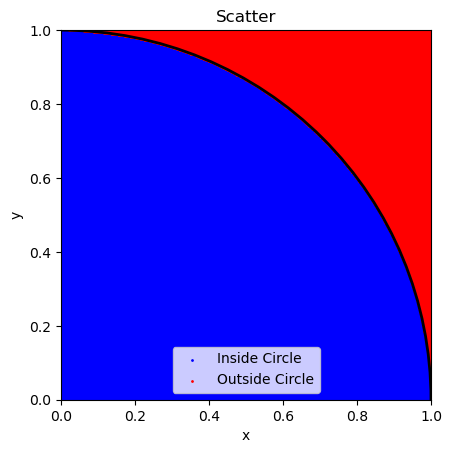

In [83]:
plt.scatter(inside_x, inside_y, color="blue", s=1, label="Inside Circle")
plt.scatter(outside_x, outside_y, color="red", s=1, label="Outside Circle")
circle = plt.Circle((0, 0), 1, color="black", fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.gca().set_aspect("equal")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter")
plt.show()

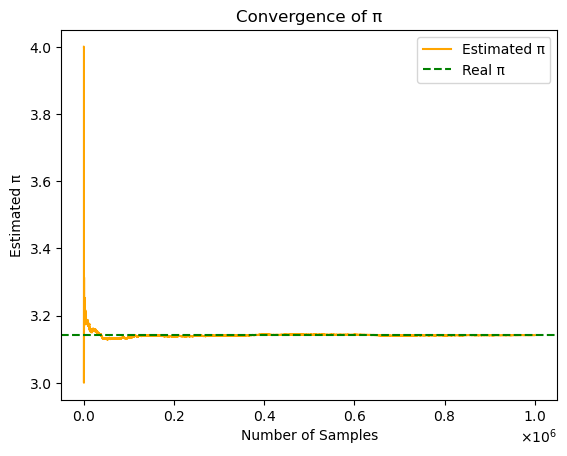

In [84]:
import matplotlib.ticker as ticker

plt.plot(range(1, samples + 1), pi_estimates, label="Estimated π", color="orange")
plt.axhline(y=3.141592653589793, color="green", linestyle="--", label="Real π")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated π")
plt.title("Convergence of π")
plt.legend()

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(10)  
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  


plt.show()

## Central Limit Theorem and Variance Estimation Analysis

In [138]:
import numpy as np

def roll_dice():
    return np.random.randint(1, 7)

total = 0 
total_sq = 0 
num_rolls = 100_000

for _ in range(num_rolls):
    roll = roll_dice()
    total += roll
    total_sq += roll**2

estimated_mean = total / num_rolls
estimated_variance = total_sq / num_rolls - (estimated_mean)**2

print(f'Estimated Mean: {estimated_mean}')
print(f'Estimated Variance: {estimated_variance}')

upper_estimate_2SD = estimated_mean + 2 * np.sqrt(estimated_variance / num_rolls)
lower_estimate_2SD = estimated_mean - 2 * np.sqrt(estimated_variance / num_rolls)

print(f'Upper Estimate (2 SD): {upper_estimate_2SD}')
print(f'Lower Estimate (2 SD): {lower_estimate_2SD}')


Estimated Mean: 3.5086
Estimated Variance: 2.917746040000001
Upper Estimate (2 SD): 3.519403232923528
Lower Estimate (2 SD): 3.497796767076472


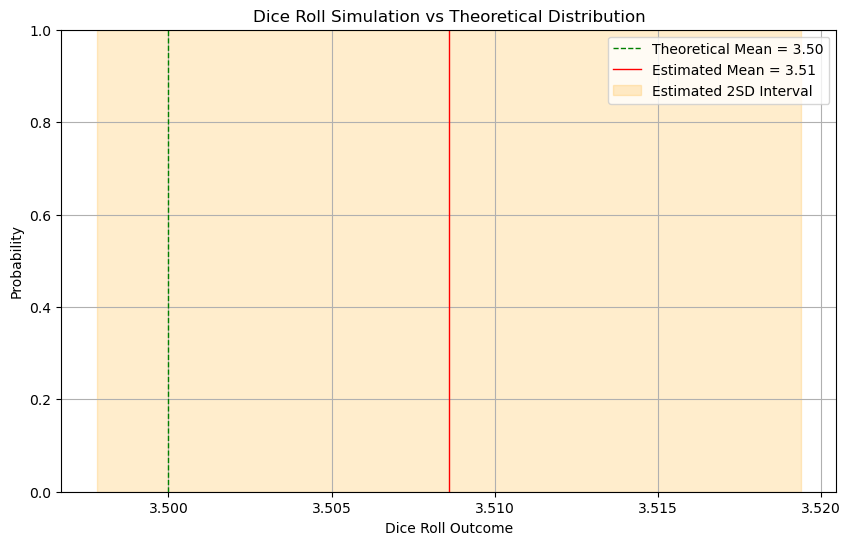

In [139]:

theoretical_mean = 3.5

x = np.linspace(1, 6, 6)  
y = [1/6] * 6 

plt.figure(figsize=(10, 6))
# plt.bar(x, y, color='lightblue', alpha=0.7, label="Theoretical Distribution (Uniform)")
plt.axvline(theoretical_mean, color='green', linestyle='--', linewidth=1, label=f"Theoretical Mean = {theoretical_mean:.2f}")
plt.axvline(estimated_mean, color='red', linestyle='-', linewidth=1, label=f"Estimated Mean = {estimated_mean:.2f}")
plt.axvspan(lower_estimate_2SD, upper_estimate_2SD, color='orange', alpha=0.2, label="Estimated 2SD Interval")

plt.title("Dice Roll Simulation vs Theoretical Distribution")
plt.xlabel("Dice Roll Outcome")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

## Use Vector for Speed Improvement

In [140]:
%%time
total = 0
num_rolls = 1_000_000

for _ in range(num_rolls):
    total += roll_dice()

estimated_mean = total / num_rolls
print(f'Estimated Mean: {estimated_mean}')

Estimated Mean: 3.498473
CPU times: user 1.09 s, sys: 10.5 ms, total: 1.1 s
Wall time: 1.13 s


In [141]:
%%time
def vector_roll_dice(num_rolls):
    return np.random.randint(1, 7, num_rolls)

num_rolls = 1_000_000
estimated_mean = np.mean(vector_roll_dice(num_rolls))
print(f'Estimated Mean: {estimated_mean}')

Estimated Mean: 3.496168
CPU times: user 18 ms, sys: 4.16 ms, total: 22.2 ms
Wall time: 21.4 ms


## An online Algorithm for the Mean

In [145]:
%%time
estimated_mean = 0
num_rolls = 1_000_000

for n in range(1, num_rolls+1):
    x = roll_dice()
    estimated_mean += (x - estimated_mean) / n

print(f'Estimated Mean: {estimated_mean}')

Estimated Mean: 3.5027530000000335
CPU times: user 1.19 s, sys: 12.1 ms, total: 1.21 s
Wall time: 1.28 s


## Constant alpha-averages: A lazy way to keep track of things

Final Estimated Mean for α = 0.01: 3.8061
Final Estimated Mean for α = 0.02: 3.8621
Final Estimated Mean for α = 0.03: 3.4675
Final Estimated Mean for α = 0.04: 3.3728
Final Estimated Mean for α = 0.05: 3.4314


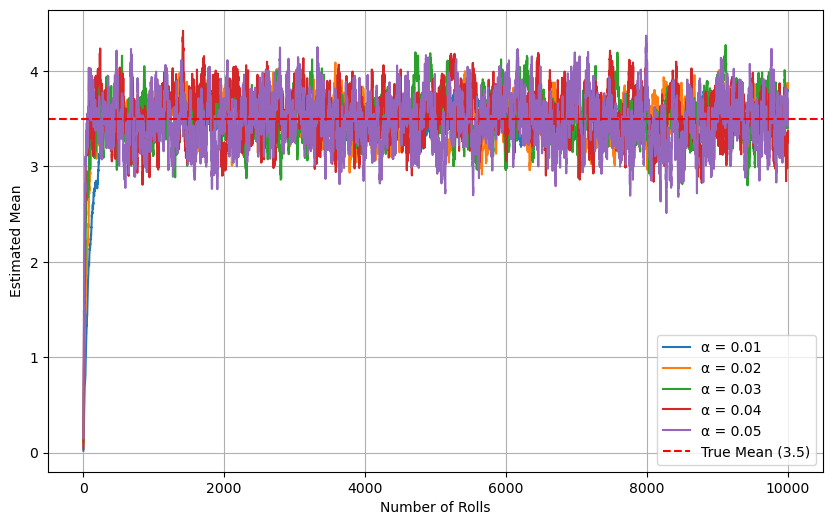

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def roll_dice():
    return np.random.randint(1, 7)

num_rolls = 10_000
alpha_values = [0.01, 0.02, 0.03, 0.04, 0.05]

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    estimated_mean = 0
    means = [] 
    
    for n in range(1, num_rolls + 1):
        x = roll_dice()
        estimated_mean += alpha * (x - estimated_mean)  
        means.append(estimated_mean) 
    
    plt.plot(range(1, num_rolls + 1), means, label=f'α = {alpha}')
    print(f'Final Estimated Mean for α = {alpha}: {estimated_mean:.4f}')

plt.axhline(y=3.5, color='r', linestyle='--', label='True Mean (3.5)')
plt.xlabel("Number of Rolls")
plt.ylabel("Estimated Mean")
plt.legend(loc="upper right")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
